<a href="https://colab.research.google.com/github/hfurkanb33/FruitDataCluster/blob/master/FruitDataCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("/content/drive/My Drive/FruitDataCluster/fruit_data_with_colors.txt", sep="\t")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

# K-Means

In [0]:
df1 = df[["fruit_name",'mass','width','height', 'color_score']].copy()

In [51]:
df1.head()

,fruit_name,mass,width,height,color_score
0,apple,192,8.4,7.3,0.55
1,apple,180,8.0,6.8,0.59
2,apple,176,7.4,7.2,0.60
3,mandarin,86,6.2,4.7,0.80
4,mandarin,84,6.0,4.6,0.79


In [0]:
df1.index = df1.iloc[:,0]

In [59]:
df1.index

Index(['apple', 'apple', 'apple', 'mandarin', 'mandarin', 'mandarin',
       'mandarin', 'mandarin', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon',
       'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon', 'lemon',
       'lemon'],
      dtype='object', name='fruit_name')

In [60]:
df1.head()

,fruit_name,mass,width,height,color_score
fruit_name,,,,,
apple,apple,192,8.4,7.3,0.55
apple,apple,180,8.0,6.8,0.59
apple,apple,176,7.4,7.2,0.60
mandarin,mandarin,86,6.2,4.7,0.80
mandarin,mandarin,84,6.0,4.6,0.79


In [0]:
df2 = df1.drop(['fruit_name'], axis = 1).copy() 

In [62]:
df2.head()

,mass,width,height,color_score
fruit_name,,,,
apple,192,8.4,7.3,0.55
apple,180,8.0,6.8,0.59
apple,176,7.4,7.2,0.60
mandarin,86,6.2,4.7,0.80
mandarin,84,6.0,4.6,0.79


In [0]:
df2.index.name = None

In [68]:
df2.head()

,mass,width,height,color_score
apple,192,8.4,7.3,0.55
apple,180,8.0,6.8,0.59
apple,176,7.4,7.2,0.60
mandarin,86,6.2,4.7,0.80
mandarin,84,6.0,4.6,0.79


In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
k_fit = kmeans.fit(df2)

In [73]:
k_fit.cluster_centers_

array([[154.21428571,   7.14285714,   7.525     ,   0.78107143],
       [353.33333333,   9.26666667,   9.26666667,   0.74666667],
       [102.16666667,   6.        ,   6.51666667,   0.75166667],
       [188.75      ,   7.4625    ,   8.575     ,   0.7425    ]])

In [74]:
k_fit.labels_

array([3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2], dtype=int32)

### Ploting

In [0]:
kmeans = KMeans(n_clusters= 2)
k_fit = kmeans.fit(df2)

In [0]:
clusters = k_fit.labels_

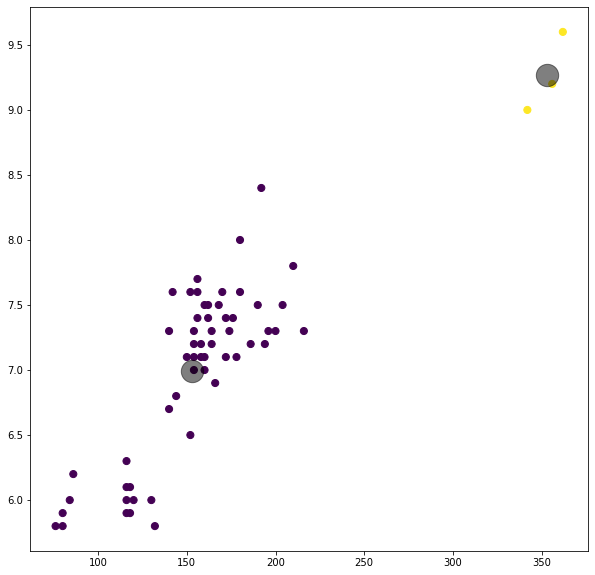

In [91]:
plt.figure(figsize=(10,10))
plt.scatter(df2.iloc[:,0] , df2.iloc[:,1], c = clusters, s = 50 )

centers = k_fit.cluster_centers_
plt.scatter(centers[:,0] , centers[:,1], c = "black", s = 500 , alpha= 0.5)

plt.show()

### Clusters and Observation Units

In [0]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df2)
clusters = k_fit.labels_

In [99]:
pd.DataFrame({"Fruits" : df2.index, "Clusters" :clusters}).head(10)

,Fruits,Clusters
0,apple,0
1,apple,0
2,apple,0
3,mandarin,2
4,mandarin,2
5,mandarin,2
6,mandarin,2
7,mandarin,2
8,apple,0
9,apple,0


In [0]:
df2["cluster_no"] = clusters

In [101]:
df2.head()

,mass,width,height,color_score,cluster_no
apple,192,8.4,7.3,0.55,0
apple,180,8.0,6.8,0.59,0
apple,176,7.4,7.2,0.60,0
mandarin,86,6.2,4.7,0.80,2
mandarin,84,6.0,4.6,0.79,2


In [108]:
df2.drop(['cluster_no'], axis = 1,inplace = True)
df2.head() 

,mass,width,height,color_score
apple,192,8.4,7.3,0.55
apple,180,8.0,6.8,0.59
apple,176,7.4,7.2,0.60
mandarin,86,6.2,4.7,0.80
mandarin,84,6.0,4.6,0.79


### Determination Of Optimum Cluster Number

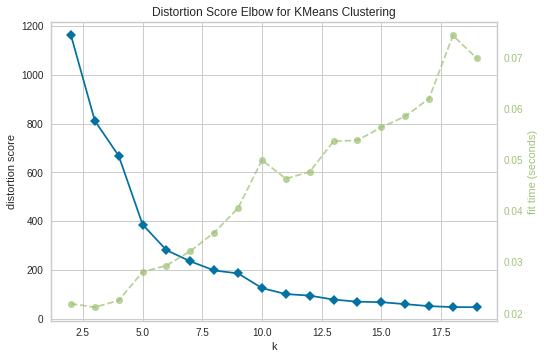

In [109]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (2,20)) # k paramater try to cluster from 2 to 20
visualizer.fit(df2)
visualizer.poof() 

# Hierarchical Clustering

In [110]:
df2.head()

,mass,width,height,color_score
apple,192,8.4,7.3,0.55
apple,180,8.0,6.8,0.59
apple,176,7.4,7.2,0.60
mandarin,86,6.2,4.7,0.80
mandarin,84,6.0,4.6,0.79


In [0]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df2, "complete")
hc_average = linkage(df2, "average")
hc_single = linkage(df2, "single")

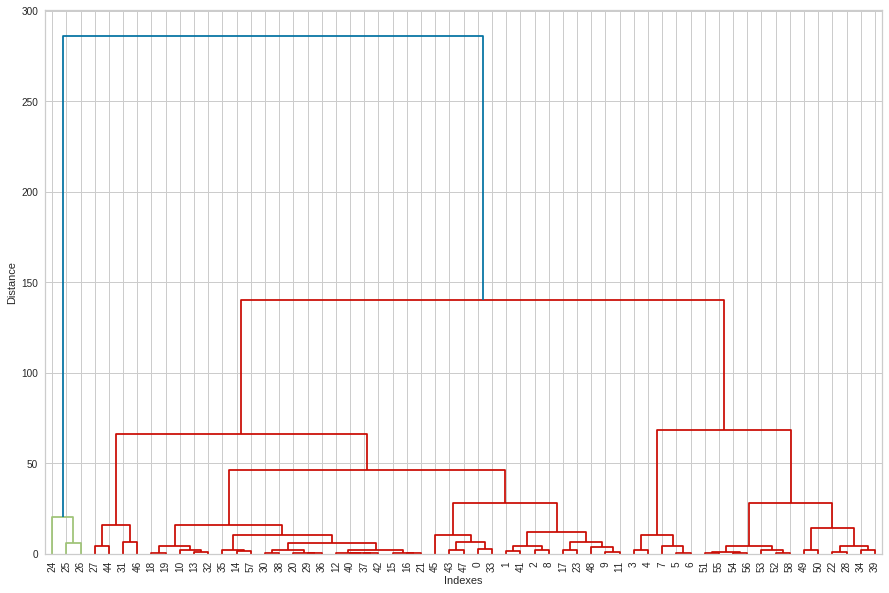

In [115]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (15,10))
plt.xlabel("Indexes")
plt.ylabel("Distance")
dendrogram(
    hc_complete,
    leaf_font_size = 10
);

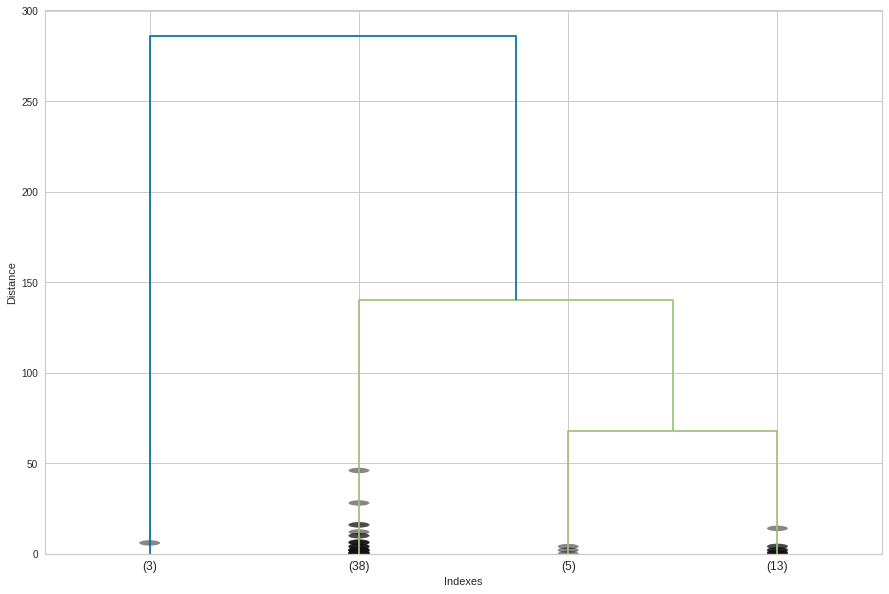

In [122]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (15,10))
plt.xlabel("Indexes")
plt.ylabel("Distance")
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

# Agglomerative Clustering

In [124]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_cluster.fit_predict(df2)

array([1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 3, 3, 3, 1, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0])

# PCA (Principal Component Analysis)

In [126]:
from sklearn.preprocessing import StandardScaler
df2 = StandardScaler().fit_transform(df2)
df2[0:5,0:5]

array([[ 0.52944179,  1.59869024, -0.29139659, -2.79359541],
       [ 0.30946246,  1.10485399, -0.66192242, -2.26868417],
       [ 0.23613601,  0.36409961, -0.36550175, -2.13745636],
       [-1.41370901, -1.11740915, -2.21813091,  0.48709984],
       [-1.45037224, -1.36432727, -2.29223608,  0.35587203]])

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df2)

In [0]:
component_df = pd.DataFrame(data = pca_fit, columns = ['principal_component_1', 'principal_component_2'])

In [132]:
component_df.head()

,principal_component_1,principal_component_2
0,1.572169,-1.980044
1,0.878417,-1.579373
2,0.529773,-1.732891
3,-2.712610,0.414674
4,-2.893412,0.242003


In [133]:
pca.explained_variance_ratio_ # temel verinin 0.57 +0.25 = 0.82 lik kısmını temsil eder.(The model represents ½82 of the main data.)

array([0.57845054, 0.25650171])

Text(0, 0.5, 'explained ratio(%)')

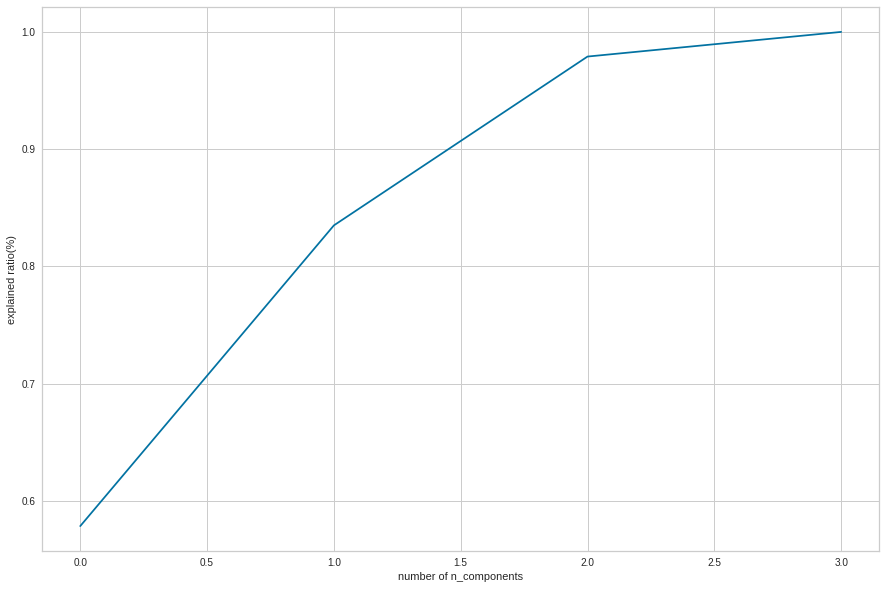

In [139]:
plt.figure(figsize=(15,10))
pca = PCA().fit(df2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of n_components")
plt.ylabel("explained ratio(%)")